***
## In this notebook. I have done exploratory data analysis. Following are some of my main observations:
   
   
1. Distribution of data 

     - Univariate and Bivariate analysis to understand the distribution of data by ploting box plots and distribution plots.

     - Understand the statistic like mean, median and mode to to get an idea of variance of data.

2. Missing value exploration and technique to handle missing values.

     - Identified missing values columns and KNN algorithm to fill those missing values.

     - Some columns had very few missing values (0.18% of data), therefore drop those rows.

3. Identified some weired/meaningless values in some of the variables.

     - negative values (-1) in "n_images" variables. (how could be there negative number of images). It could be typo -1 instead of 1 or just a null representation by -1.

4. Identified outliers in some of the variables:

     - Around 2400000 number of images for against some of the hotels. Seems to be wrong data.

     - Also, distance to city center is around 16000 kms. Seems to be wrong data.

     - Also, number of reveiws are very high for some of the hotels

***

In [ ]:
import numpy as np
import pandas as pd
import matplaotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


%matplotlib inline

## Loading Data 
***

In [2]:
df_train=pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')
df_train['source']='train'
df_test['source']='test'
print('Shape Train data :',df_train.shape)
print('Shape Test data :',df_test.shape)
df_full=pd.concat([df_train,df_test])
print('Shape Full data :',df_full.shape)

Shape Train data : (396487, 13)
Shape Test data : (132162, 12)
Shape Full data : (528649, 13)


In [3]:
df_train.head(5)

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks,source
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0,train
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4,train
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44,train
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4,train
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10,train


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 13 columns):
hotel_id              396487 non-null float64
city_id               395979 non-null float64
content_score         395979 non-null float64
n_images              395978 non-null float64
distance_to_center    395958 non-null float64
avg_rating            286089 non-null float64
stars                 395925 non-null float64
n_reviews             395958 non-null float64
avg_rank              396487 non-null float64
avg_price             396317 non-null float64
avg_saving_percent    396317 non-null float64
n_clicks              396487 non-null int64
source                396487 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 39.3+ MB


In [5]:
df_train.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.964870e+05,395979.000000,395979.000000,3.959780e+05,3.959580e+05,286089.000000,395925.000000,395958.000000,396487.000000,396317.000000,396317.000000,396487.000000
mean,1.326304e+11,149193.465376,50.992795,2.593212e+02,1.634383e+04,81.616525,1.159659,913.667419,14.694502,109.332048,7.179601,13.781980
std,1.033722e+11,219189.285044,11.563444,1.731682e+04,2.752200e+05,6.025140,1.619713,2432.494160,5.604578,148.198851,13.081529,123.572896
min,1.557962e+08,2.000000,7.000000,-1.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.062255e+10,32014.000000,45.000000,0.000000e+00,5.440000e+02,79.000000,0.000000,0.000000,11.091000,51.050000,0.000000,0.000000
50%,1.087280e+11,55122.000000,53.000000,1.000000e+00,1.516000e+03,83.000000,0.000000,189.000000,15.000000,77.650000,0.000000,0.000000
75%,2.281935e+11,137464.000000,59.000000,2.000000e+00,4.163000e+03,86.000000,3.000000,777.000000,18.375000,120.930000,10.000000,2.000000
max,3.237114e+11,878736.000000,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


In [6]:
df_test.head(5)

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,source
0,14942256073,122750.0,58.0,2.0,11503.0,89.0,0.0,168.0,13.500,90.19,32.0,test
1,16036037903,28134.0,68.0,4.0,938.0,81.0,5.0,735.0,13.667,98.27,19.0,test
2,288585940112,30578.0,19.0,0.0,38982.0,NaN,0.0,0.0,20.462,48.77,0.0,test
3,129041645070,54398.0,47.0,0.0,1683.0,80.0,0.0,69.0,15.000,72.32,0.0,test
4,12460296563,63890.0,59.0,3.0,1299.0,80.0,3.0,1470.0,10.000,24.54,19.0,test


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132162 entries, 0 to 132161
Data columns (total 12 columns):
hotel_id              132162 non-null int64
city_id               132007 non-null float64
content_score         132007 non-null float64
n_images              132006 non-null float64
distance_to_center    131999 non-null float64
avg_rating            95532 non-null float64
stars                 131987 non-null float64
n_reviews             131999 non-null float64
avg_rank              132162 non-null float64
avg_price             132104 non-null float64
avg_saving_percent    132104 non-null float64
source                132162 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 12.1+ MB


In [8]:
df_test.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,1.321620e+05,132007.000000,132007.000000,1.320060e+05,1.319990e+05,95532.000000,131987.000000,131999.000000,132162.000000,132104.000000,132104.000000
mean,1.327811e+11,149248.661753,50.951366,3.570879e+02,1.552516e+04,81.621875,1.155894,901.242396,14.714384,108.717507,7.117423
std,1.035654e+11,219593.127464,11.599738,2.095240e+04,2.495190e+05,6.022775,1.616911,2515.974576,5.658890,144.893482,12.979140
min,1.558896e+08,1354.000000,7.000000,-1.000000e+00,0.000000e+00,43.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,4.082460e+10,31986.000000,45.000000,0.000000e+00,5.420000e+02,79.000000,0.000000,0.000000,11.043000,50.810000,0.000000
50%,1.082218e+11,55118.000000,53.000000,1.000000e+00,1.514000e+03,83.000000,0.000000,186.000000,15.000000,77.480000,0.000000
75%,2.288447e+11,137444.000000,59.000000,2.000000e+00,4.158000e+03,86.000000,3.000000,759.000000,18.429000,121.010000,9.000000
max,3.233873e+11,878696.000000,80.000000,2.628317e+06,1.603577e+07,98.000000,5.000000,254859.000000,99.000000,7938.770000,100.000000


***
- n_images: mean of number of images is high. However, median is small (high spreadness in data, i.e, high standard deviation). I also can see negative number of images (I don't undertand why?). Is it wrong negative sign by mistake or some other?

- n_reviews: number of reviews are also highly spread (mean and median are highly spread).

In [9]:
print("number of rows with negative images in train data: "+str(len(df_train[df_train['n_images']<0])))
print("number of rows with negative images in test data: "+str(len(df_test[df_test['n_images']<0])))

number of rows with negative images in train data: 3361
number of rows with negative images in test data: 1119


***
- Negative number of images could be due to following reasons:
    - "data feeding" mistake, where negative sign was put by mistake
    - it meant null where there is no information of number of images


- I make negative -1 to 1 in n_images column    
***    

In [10]:
df_train['n_images'].replace(-1,1,inplace=True)
df_test['n_images'].replace(-1,1,inplace=True)

In [11]:
print("number of rows with negative images in train data: "+str(len(df_train[df_train['n_images']<0])))
print("number of rows with negative images in test data: "+str(len(df_test[df_test['n_images']<0])))

number of rows with negative images in train data: 0
number of rows with negative images in test data: 0


In [12]:
print('Shape Train data :',df_train.shape)
print('Shape Test data :',df_test.shape)

Shape Train data : (396487, 13)
Shape Test data : (132162, 12)


***
### Missing Values
***

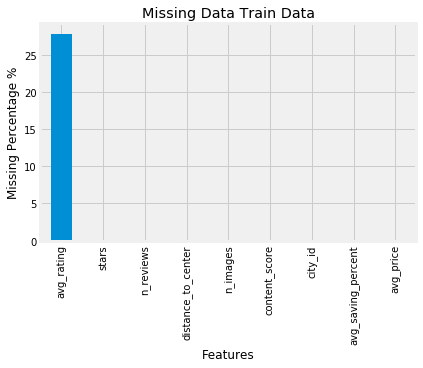

In [13]:
missing_data_train=df_train.isnull().sum()/df_train.shape[0]*100
missing_data_train=missing_data_train[missing_data_train>0]
missing_data_train.sort_values(ascending=False,inplace=True)
missing_data_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data Train Data')
plt.show()

In [14]:
missing_data_train.head(10)

avg_rating            27.844040
stars                  0.141745
n_reviews              0.133422
distance_to_center     0.133422
n_images               0.128377
content_score          0.128125
city_id                0.128125
avg_saving_percent     0.042877
avg_price              0.042877
dtype: float64

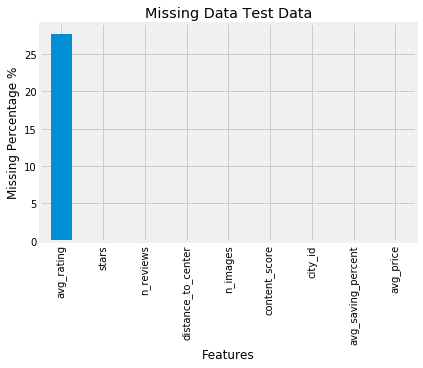

In [15]:
missing_data_test=df_test.isnull().sum()/df_test.shape[0]*100
missing_data_test=missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False,inplace=True)
missing_data_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data Test Data')
plt.show()

In [16]:
missing_data_test.head(10)

avg_rating            27.715985
stars                  0.132413
n_reviews              0.123333
distance_to_center     0.123333
n_images               0.118037
content_score          0.117280
city_id                0.117280
avg_saving_percent     0.043886
avg_price              0.043886
dtype: float64

***
*** Missing Values Analysis ***

- Columns "hotel_id" and "avg_rank" have have non null values, rest columns have some null values.

- "city_id" and "content_score" have similar number of missing values

- "avg_price" and "avg_saving_percent" also have similar number of missing values

- "n_reviews" and "distance_to_center" also have similar number of missing values
    
- % missing values distribution in both test and train data is almost similar 

- avg_rating has highest % of missing values. However, it can not be removed. As per my understang, it is important variable to predict the number of clicks. However, let's check this ahead. 

***

#### Checking if missing values in some columns occurs together since number of missing values are same

In [17]:
df_train[df_train['avg_price'].isnull()].equals(df_train[df_train['avg_saving_percent'].isnull()])

True

In [18]:
df_train[df_train['city_id'].isnull()].equals(df_train[df_train['content_score'].isnull()])

True

In [19]:
df_train[df_train['n_reviews'].isnull()].equals(df_train[df_train['distance_to_center'].isnull()])

True

### Column pairs described in 2,3,4 have missing values occurence together (is there any relation when one column's value is missing, hence other's values is missing)
##### Can not make out any relation between "city_id" and "content_score" (might either no content hence 0 content_score, but here it is missing) 
##### As per my understanding, if "avg_price" is there, "avg_saving_percent" can not be computed given avg_price offered for same hotel by other providers
##### Can not make out any relation between "n_reviews" and "distance_to_center"

***
## Strategies for handling missing values

** 1. Rows of dataset with missing values can be dropped for better prediction model. However, it could reduce size of dataset if there are huge number of missing values. Since we have few missing values for some of columns, we can drop following rows where values of any of below columns are NULL: **
 - stars                  
 - n_reviews            
 - distance_to_center     
 - n_images               
 - content_score          
 - city_id                
 - avg_saving_percent     
 - avg_price
 
Note: we just miss around 0.18% of data  when we drop rows with null values (In any of above 8 columns). This is small number given this dataset. It could be reasonable to loose this data. 

In [20]:
df_train_nn=df_train.loc[((df_train.stars.notnull()) & (df_train.n_reviews.notnull()) & \
                          (df_train.distance_to_center.notnull()) & (df_train.n_images.notnull()) & \
                          (df_train.content_score.notnull())) & (df_train.city_id.notnull()) & \
                         (df_train.avg_saving_percent.notnull()) & (df_train.avg_price.notnull()),:]


df_test_nn=df_test.loc[((df_test.stars.notnull()) & (df_test.n_reviews.notnull()) & \
                          (df_test.distance_to_center.notnull()) & (df_test.n_images.notnull()) & \
                          (df_test.content_score.notnull())) & (df_test.city_id.notnull()) & \
                         (df_test.avg_saving_percent.notnull()) & (df_test.avg_price.notnull()),:]

print('Shape Train Data after removing NaN :',df_train_nn.shape)
print('Shape Validation Data after removing NaN :',df_test_nn.shape)


print("-"*70)
print("\n Rounded Values")
print('Percentage of Train Data dropped :',\
      round((df_train.shape[0]-df_train_nn.shape[0])/df_train.shape[0]*100,2) , '%')
print('Percentage of Validation Data dropped :',\
      round((df_test.shape[0]-df_test_nn.shape[0])/df_test.shape[0]*100,2) , '%')


print("-"*70)
print("\n Non Rounded Values")
print('Percentage of Train Data dropped :',\
      ((df_train.shape[0]-df_train_nn.shape[0])/df_train.shape[0]*100,2) , '%')
print('Percentage of Validation Data dropped :',\
      ((df_test.shape[0]-df_test_nn.shape[0])/df_test.shape[0]*100,2) , '%')

Shape Train Data after removing NaN : (395760, 13)
Shape Validation Data after removing NaN : (131929, 12)
----------------------------------------------------------------------

 Rounded Values
Percentage of Train Data dropped : 0.18 %
Percentage of Validation Data dropped : 0.18 %
----------------------------------------------------------------------

 Non Rounded Values
Percentage of Train Data dropped : (0.18336036238262543, 2) %
Percentage of Validation Data dropped : (0.17629878482468486, 2) %


***
** Now we are left with "avg_rating" column which have missing values. However, avg_rating values are missing in around 27% of rows. We can not drop all 27% of rows as we will be reducded with less data for modelling. Also, as per my understanding it is important variable to predict number of clicks

***

In [21]:
print("Number of unique hotel id's in train data: "+str(len(df_train['hotel_id'].unique())))
print("Number of unique hotel id's in test data: "+str(len(df_test['hotel_id'].unique())))
print("Number of unique city id's in train data: "+str(len(df_train['city_id'].unique())))
print("Number of unique city id's in test data: "+str(len(df_test['city_id'].unique())))


Number of unique hotel id's in train data: 396487
Number of unique hotel id's in test data: 132162
Number of unique city id's in train data: 33214
Number of unique city id's in test data: 20904


***

** 2. Replace the missing values by most frequent value (mode), mean or median. **

- Idea was to fiill missing values by taking mode/mean/median from same hotel id's "avg_rating". However, there is only one row per hotel. Hence, it can not be applied. 

- On the other hand, ratings from similar city id's, similar star hotel, similar distance to city centers could not make sense, we will see ahead. 


***

** 3. Predict the values of missing column from other columns. We need to investigate into correlation analysis.


***

** 4. Fill missing values using K-Nearest Neighbor or K-means algorithm. We will see what makes more sense. 

***

## Analyze distribution of variables

In [22]:
df_num_train=df_train_nn.select_dtypes(['float64','int64'])
df_cat_train=df_train_nn.select_dtypes(['object'])
print('Continious Variables :',df_num_train.columns.values,'   ', len(df_num_train.columns.values))
print('Categorical Variables :',df_cat_train.columns.values,'',len(df_cat_train.columns.values))

Continious Variables : ['hotel_id' 'city_id' 'content_score' 'n_images' 'distance_to_center'
 'avg_rating' 'stars' 'n_reviews' 'avg_rank' 'avg_price'
 'avg_saving_percent' 'n_clicks']     12
Categorical Variables : ['source']  1


In [23]:
df_num_test=df_test_nn.select_dtypes(['float64','int64'])
df_cat_test=df_test_nn.select_dtypes(['object'])
print('Continious Variables :',df_num_test.columns.values,'   ', len(df_num_test.columns.values))
print('Categorical Variables :',df_cat_test.columns.values,'',len(df_cat_test.columns.values))

Continious Variables : ['hotel_id' 'city_id' 'content_score' 'n_images' 'distance_to_center'
 'avg_rating' 'stars' 'n_reviews' 'avg_rank' 'avg_price'
 'avg_saving_percent']     11
Categorical Variables : ['source']  1


### Univariate Analysis

#### Distribution Plots

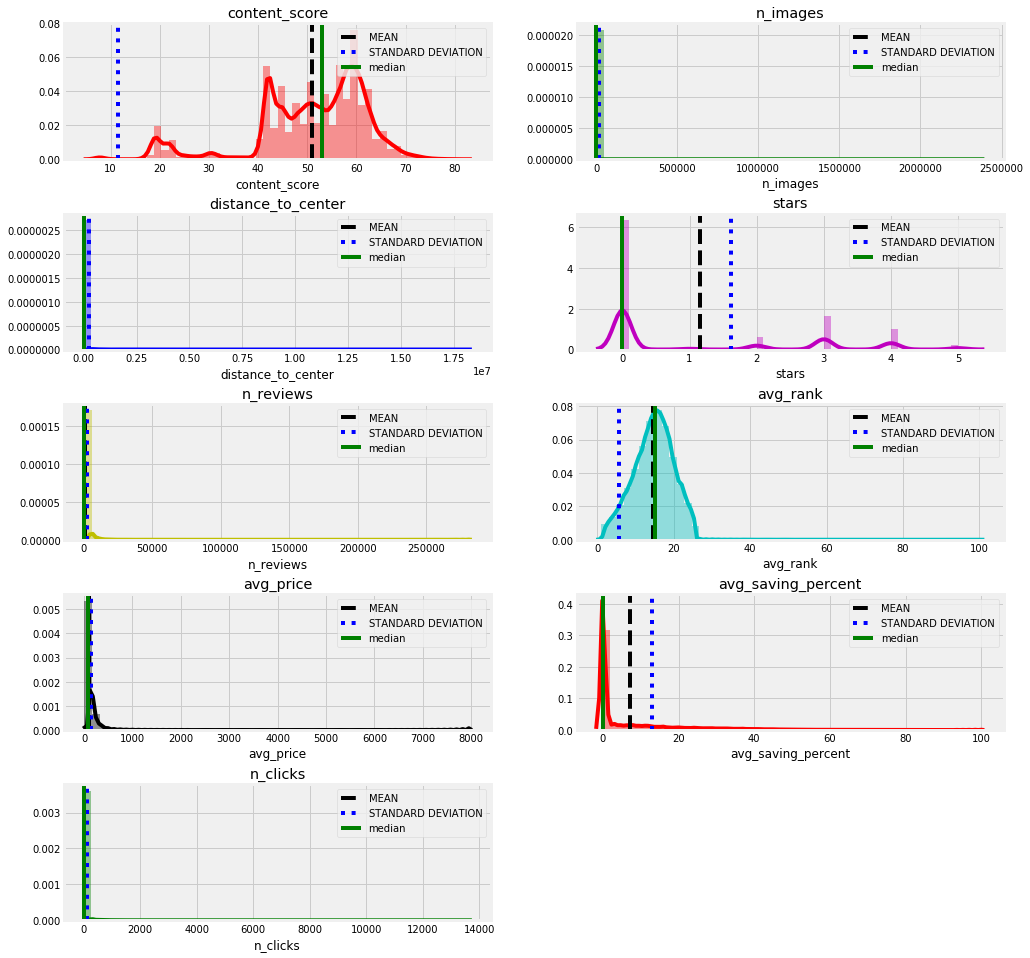

In [24]:
columns = ['content_score' ,'n_images', 'distance_to_center', 'stars', 'n_reviews', 'avg_rank', 'avg_price','avg_saving_percent','n_clicks']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","r","g"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    sns.distplot(df_num_train[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    plt.axvline(df_num_train[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num_train[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.axvline(df_num_train[i].median(),color = "g",linestyle="solid",label="median")
    
    plt.legend(loc="upper right")
    
    

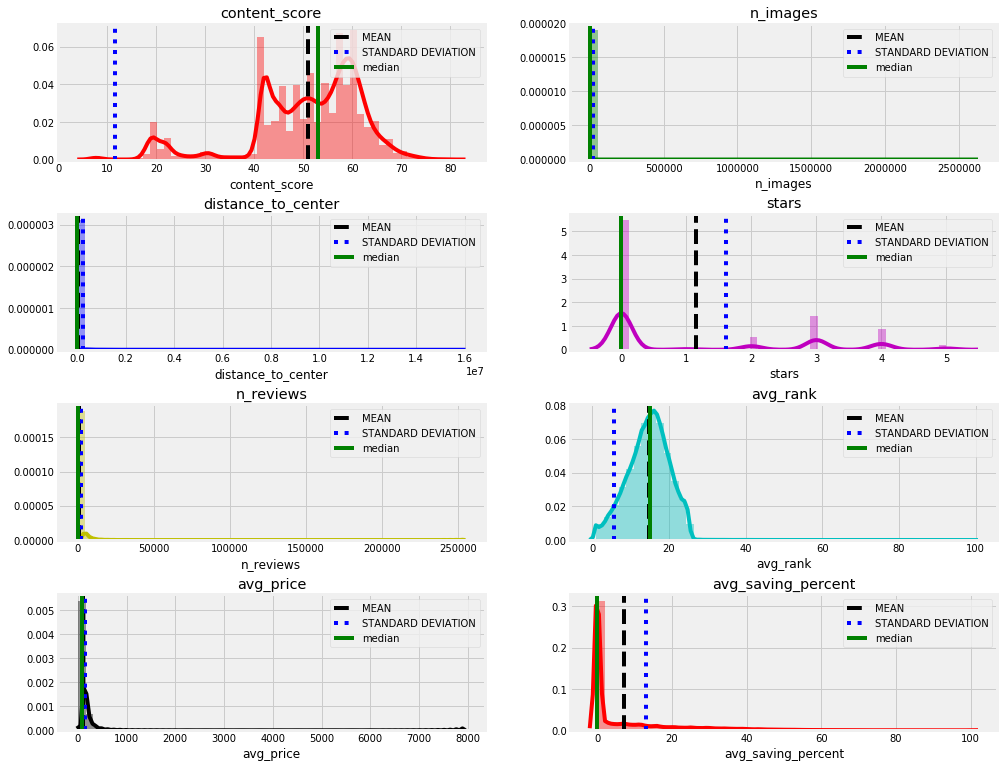

In [25]:
columns = ['content_score' ,'n_images', 'distance_to_center', 'stars', 'n_reviews', 'avg_rank', 'avg_price','avg_saving_percent']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","r"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    sns.distplot(df_num_test[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    plt.axvline(df_num_test[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num_test[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.axvline(df_num_test[i].median(),color = "g",linestyle="solid",label="median")
    
    plt.legend(loc="upper right")

** Distribution Plot Analysis **

- The content_score with high value should have high number of clicks (if content is good, there is higher chances of getting clicked).
- variable "stars" has median zero, distribution is rightly skewed. It means lot of values are zero. The given data has stars values from 0 to 5. The zero (0) star hotel offer is possible, for example "AirBnb" rooms/house are usually offered as 0 star. I think, user clicks more on offers with high stars value. Therefore, I keep it as a numerical column.
- variable "avg_rank" is symmetrically distributed (mean and median are same). The order of values might matter (highest rank might have high chance of getting clicked). I consider it as a numeric column.  
- avg_price and avg_saving_percent's distribution is rightly skewed. 

#### Box Plot

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


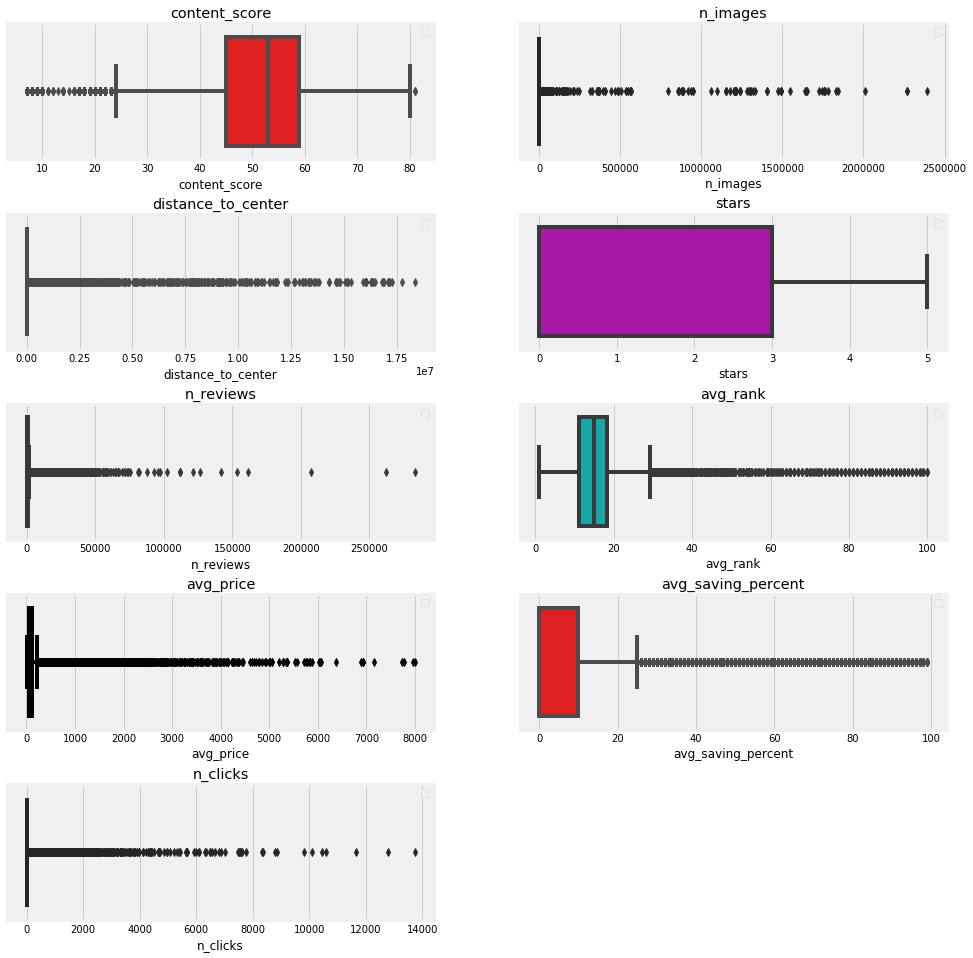

In [26]:
columns = ['content_score' ,'n_images', 'distance_to_center', 'stars', 'n_reviews', 'avg_rank', 'avg_price','avg_saving_percent','n_clicks']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","r","g"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    sns.boxplot(df_num_train[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    plt.legend(loc="upper right")
    
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


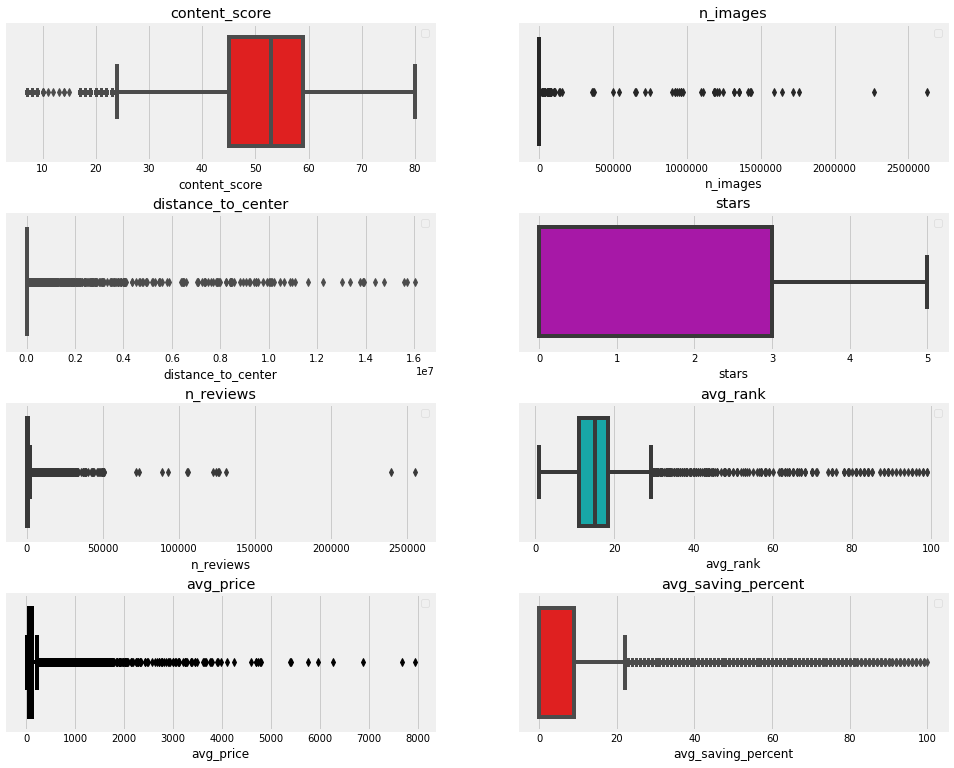

In [27]:
columns = ['content_score' ,'n_images', 'distance_to_center', 'stars', 'n_reviews', 'avg_rank', 'avg_price','avg_saving_percent']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","r"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(6,2,j+1)
    sns.boxplot(df_num_test[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    plt.legend(loc="upper right")

** BOX Plot Analysis **

- 2.5 million images for one hotel seems to be unsual to me. According to me, variable "n_iamges" seems to have outliers.
- Also, distance to center is 16000 (16k) kilometers [16000000 meters] . However, seems to have some outliers.
- Around 250000 number of reviews for one hotel. It could be possible but seems to be outlier to me.
#### For this run we will keep outliers.


#### Looking at percentage of rows with zero "star" values

No handles with labels found to put in legend.


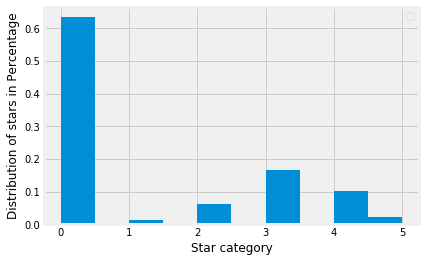

In [28]:
data = np.array(df_train_nn["stars"].tolist())
weights = np.ones_like(data) / len(data)

num_bins = 10
_n, bins, _patches = plt.hist(data, num_bins, weights=weights)
plt.legend()

plt.xlabel('Star category')
plt.ylabel('Distribution of stars in Percentage')
plt.show()

***
High number of hotels with 0 stars. It might be possible where lot of offers arehave star ratings (AirBnb rooms?)
***

### Bi Variate Analysis

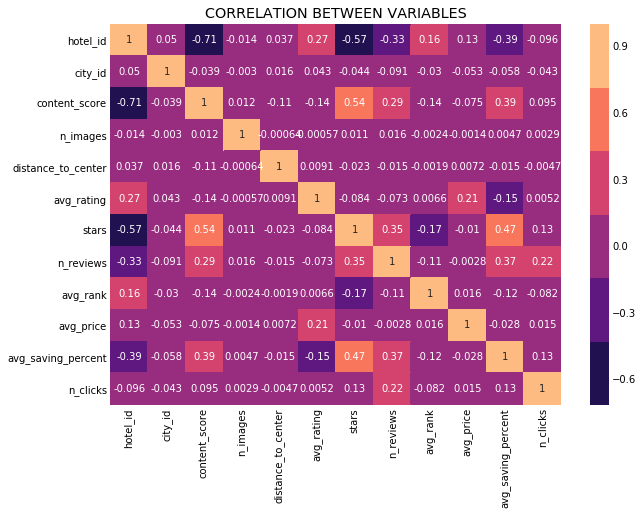

In [29]:
correlation = df_num_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

** Correlation Analysis **

-  "content_score" and "stars" are (little bit high) positively correlated --> if content is good it means there is lot to showcase on offers, more amenities and hence more stars.
-  "stars" and "avg_percent_saving" are (little biy high) positively correlated
- I can not see strong correlation between avg_rating and any other variable. Therefore, any prediction model would not feasible to fill missing values for avg_rating.
- There is no strong correlated variable with n_clicks.


***
Correlation between target var and stars
***

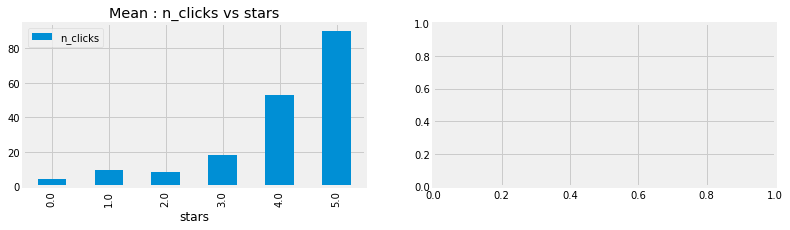

In [57]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train_nn[['stars','n_clicks']].groupby(['stars']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : n_clicks vs stars')
plt.show()
pd.crosstab(df_train_nn.stars,df_train_nn.n_clicks,margins=True).style.background_gradient(cmap='summer_r')


Average number of cicks are higher as stars of hotels are increasing. However, there is around 65% of cases overall where number of clicks are zero.

***
### Now task is how could we fill missing values in "avg_rating" column
***

Importance: If prices are the same, users are 3.9 times more likely to choose a hotel with higher review scores. 
When hotel prices are increased for those hotels with higher review scores, people are still likely to book. 
The study found that 76% of customers were willing to pay more for a hotel with higher review scores. Therefore, it is important to have avg_ratings in place.

source: [https://econsultancy.com/online-reviews-work-so-why-do-so-few-hotels-use-them/]


In [30]:
print("In Train Data:")
print("Number of null values in avg_rating: "+str(len(df_train_nn[df_train_nn["avg_rating"].isnull()])))
print("Number of 0 number of reviews: "+str(len(df_train_nn[df_train_nn['n_reviews']==0])))
print("Number of 0 number of reviews and null avg rating: "+str(len(df_train_nn[(df_train_nn["avg_rating"].isnull())&(df_train_nn["n_reviews"]==0)])))
      

In Train Data:
Number of null values in avg_rating: 109734
Number of 0 number of reviews: 109734
Number of 0 number of reviews and null avg rating: 109734


In [31]:
print("In Test Data:")
print("Number of null values in avg_rating: "+str(len(df_test_nn[df_test_nn["avg_rating"].isnull()])))
print("Number of 0 number of reviews: "+str(len(df_test_nn[df_test_nn['n_reviews']==0])))
print("Number of 0 number of reviews and null avg rating: "+str(len(df_test_nn[(df_test_nn["avg_rating"].isnull())&(df_test_nn["n_reviews"]==0)])))
      

In Test Data:
Number of null values in avg_rating: 36419
Number of 0 number of reviews: 36419
Number of 0 number of reviews and null avg rating: 36419


***
- when number of reviews are 0, then avg_rating is null. It might be because of following formula:

    - avg_rating =  sum_of_all_reviews/n_reviews(number of reviews)


- It does not make sense to put avg_rating as zero when there is no reviews. It means we are inducing that hotel is not good when there are no reviews. No review does not indicate the bad rating.



***
Ideas:

- Business Idea: Take avg ratings from hotels with combination of same "city" and "stars"

- Business Idea and Data driven approach: hotels with high percent savings, near to city center and high stars tend to have higher rating. We could find it by K-Nearest approach.

***    

### Let's implement second idea. Taking features from business idea and getting closeset avg_rating from KNN algorithm

In [32]:
def prepare_missing_non_missing_data(data,data_type):
    
    """
    This function divides dataframe into 2 parts: one dataframe with missing avg_fact values (test data for KNN) and another with
    non missing avg_fact values (train data for KNN). 
    
    Args:
        data: pandas dataframe
        data_type: "train" or "test"
        
    Returns:
        training and test data for KNN model
    
    """
    
    data_w_avg_rating=data[data['avg_rating'].notnull()]
    print("In "+str(data_type)+", number of avg_rating filled values rows: "+str(len(data_w_avg_rating)))

    data_wo_avg_rating=data[data['avg_rating'].isnull()]
    print("In "+str(data_type)+", number of avg_rating missing values rows: "+str(len(data_wo_avg_rating)))
    
    
    data_train_knn=data_w_avg_rating[['hotel_id','avg_saving_percent','stars','distance_to_center','avg_rating']]
    data_test_knn=data_wo_avg_rating[['hotel_id','avg_saving_percent','stars','distance_to_center','avg_rating']]

    
    return data_train_knn,data_test_knn
    
    
    

In [33]:
def prepare_test_train_data(data_train,data_test,features_list):
    """
    This function prepares test and train data for KNN model to fill missing valeus.
    
    """
    
    Y_train=data_train['avg_rating'].values
    X_train=data_train[features_list].values
    
    X_test=data_test[features_list].values
    
    return Y_train,X_train,X_test

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def KNN_model(data,data_type,features_list,neighbors):
    
    """
    This function train model based on features and avg_rating as dependent variable. It predicts "avg_rating" values for 
    missing values.
    
    """
    
    # divide dataframe in 2 parts: one part with null avg_rating and other with non null avg_rating
    data_train,data_test=prepare_missing_non_missing_data(data,data_type)
    
    # prepare test and train data
    Y_train,X_train,X_test=prepare_test_train_data(data_train,data_test,features_list)
    
    # Scaling features
    scaler=StandardScaler()
    scaler.fit(X_train)
    
    X_train_transform=scaler.transform(X_train)
    
    ### If you take the mean and variance of the whole dataset you'll be introducing future information 
    #into the training explanatory variables (i.e. the mean and variance)
    
    ## training model parameters are used to scale parameters in test data (i.e, model learn to classify less than 6 to class1
    ## and if we do different scaling on test data, model could predict wrong). Moreover, our test and train data are from same
    ## distribution. It does not matter even if we use different scaling.
    
    X_test_transform=scaler.transform(X_test)
    
    # fitting KNN model
    neigh = KNeighborsClassifier(n_neighbors=neighbors)
    neigh.fit(X_train_transform,Y_train) 
    
    # predicting nearest neighbor
    data_test['avg_rating']=neigh.predict(X_test_transform) 
    
    # concatenatig train and test data
    result = pd.concat([data_train,data_test])
    
    
    return result

***
Filling missing values in Train Data
***

In [35]:
KNN_res=KNN_model(df_train_nn,"Train_Data",['distance_to_center','stars', 'avg_saving_percent'],20)

In Train_Data, number of avg_rating filled values rows: 286026
In Train_Data, number of avg_rating missing values rows: 109734


In [36]:
print(df_train_nn.isnull().any())
print("Number of rows: "+str(len(df_train_nn)))

hotel_id              False
city_id               False
content_score         False
n_images              False
distance_to_center    False
avg_rating             True
stars                 False
n_reviews             False
avg_rank              False
avg_price             False
avg_saving_percent    False
n_clicks              False
source                False
dtype: bool
Number of rows: 395760


In [37]:
df_train_nn['avg_rating']=KNN_res['avg_rating'].values

In [38]:
print(df_train_nn.isnull().any())
print("Number of rows: "+str(len(df_train_nn)))

hotel_id              False
city_id               False
content_score         False
n_images              False
distance_to_center    False
avg_rating            False
stars                 False
n_reviews             False
avg_rank              False
avg_price             False
avg_saving_percent    False
n_clicks              False
source                False
dtype: bool
Number of rows: 395760


In [43]:
df_train_nn.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.957600e+05,395760.000000,395760.000000,3.957600e+05,3.957600e+05,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000
mean,1.326171e+11,149201.829649,50.998168,2.594807e+02,1.634567e+04,81.953492,1.159817,913.977024,14.698238,109.305688,7.179389,13.790722
std,1.033831e+11,219183.587564,11.559788,1.732158e+04,2.752866e+05,5.363587,1.619751,2432.950137,5.600627,148.138436,13.081077,123.644148
min,1.557962e+08,2.000000,7.000000,0.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.060029e+10,32014.000000,45.000000,0.000000e+00,5.440000e+02,80.000000,0.000000,0.000000,11.100000,51.040000,0.000000,0.000000
50%,1.086614e+11,55126.000000,53.000000,1.000000e+00,1.516000e+03,83.000000,0.000000,189.000000,15.000000,77.640000,0.000000,0.000000
75%,2.282436e+11,137464.000000,59.000000,2.000000e+00,4.163000e+03,85.000000,3.000000,777.000000,18.375000,120.920000,10.000000,2.000000
max,3.237114e+11,878736.000000,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


In [47]:
df_train_nn.to_csv("train_data_processed.csv",index=False)

***
Filling missing values in Test Data
***

In [39]:
KNN_res=KNN_model(df_test_nn,"Test_Data",['distance_to_center','stars', 'avg_saving_percent'],20)

In Test_Data, number of avg_rating filled values rows: 95510
In Test_Data, number of avg_rating missing values rows: 36419


In [40]:
print(df_test_nn.isnull().any())
print("Number of rows: "+str(len(df_test_nn)))

hotel_id              False
city_id               False
content_score         False
n_images              False
distance_to_center    False
avg_rating             True
stars                 False
n_reviews             False
avg_rank              False
avg_price             False
avg_saving_percent    False
source                False
dtype: bool
Number of rows: 131929


In [41]:
df_test_nn['avg_rating']=KNN_res['avg_rating'].values

In [42]:
print(df_test_nn.isnull().any())
print("Number of rows: "+str(len(df_test_nn)))

hotel_id              False
city_id               False
content_score         False
n_images              False
distance_to_center    False
avg_rating            False
stars                 False
n_reviews             False
avg_rank              False
avg_price             False
avg_saving_percent    False
source                False
dtype: bool
Number of rows: 131929


In [44]:
df_test_nn.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,1.319290e+05,131929.000000,131929.000000,1.319290e+05,1.319290e+05,131929.000000,131929.000000,131929.000000,131929.000000,131929.000000,131929.000000
mean,1.327940e+11,149287.786825,50.955802,3.573127e+02,1.553177e+04,81.965641,1.155963,901.595222,14.717063,108.718997,7.117904
std,1.035748e+11,219628.776768,11.596075,2.095851e+04,2.495850e+05,5.364754,1.616921,2516.531837,5.654786,144.928136,12.980529
min,1.558896e+08,1354.000000,7.000000,0.000000e+00,0.000000e+00,43.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,4.083429e+10,31986.000000,45.000000,0.000000e+00,5.420000e+02,80.000000,0.000000,0.000000,11.050000,50.810000,0.000000
50%,1.082051e+11,55122.000000,53.000000,1.000000e+00,1.514000e+03,83.000000,0.000000,186.000000,15.000000,77.480000,0.000000
75%,2.288802e+11,137444.000000,59.000000,2.000000e+00,4.158000e+03,85.000000,3.000000,759.000000,18.429000,121.010000,9.000000
max,3.233873e+11,878696.000000,80.000000,2.628317e+06,1.603577e+07,98.000000,5.000000,254859.000000,99.000000,7938.770000,100.000000


In [48]:
df_test_nn.to_csv("test_data_processed.csv",index=False)

In [ ]:
## Percentage of rows where n_clicks=0

In [49]:
len(df_train_nn[df_train_nn['n_clicks']==0])/len(df_train_nn)

0.6540453810390136

### Major Insights from EDA
***
- Distribution of test and train data is similar.
- 'avg_rating' has highest % (around 28%) of missing values. It is due to zero number of "n_reviews".
- 'n_images' have occureence of negative values (mostly -1). It might be typo or intentionally done for missing values. I assumed it to be typo and replace those 1.
- 'n_reviews' and 'n_images' seems to have outliers (very high values). However, I consider these values as it is. Neverthelees, some technique to handle outlier values could be applied (i.e, simple way is if values are beyond "2Xstd", just cap it by 2*std value. However, it totally depeneds on business.)
-  Number of "stars" columns have 0 value (advertiser does not provide?)
- Percentage of rows where n_clicks=0

*** 
# Future improvement regarding missing values:

Note: The rows which I had removed (missing values in any of above 8 columns, i.e. avg_price, content_score) could have imputed using some business idea like "avg_price" of hotel from other hotels of similar cities have similar values (Zurich's hotel price on avg have 150 euro per night). Likewise could have imputed for other variables. However, I removed those rows since it was just contributing to 0.18% of whole dataset.

Also, I have used K=20 arbitrarly in KNN algorithm. It could be derived from data driven approach. However, rule of thumb is K=n**(1/2), where n is number of samples.

I also could have imputed 'median'/'mean' avg_rating from same cities (similar star hotels). However, for in cities there are only one specific's star hotel which have 0 rating. Therefore, can not impute for this case. Hence, I left this idea.
***